# Predicting Math Scores Using Machine Learning

This project uses a student performance dataset to predict math scores based on various features such as reading and writing scores, gender, lunch type, etc. The goal is to practice data cleaning, visualization, and regression modeling.


Import Libraries

In [1]:
import pandas as pd

Loading the Dataset

In [3]:
df = pd.read_csv('/content/StudentsPerformance.csv')

EDA (Exploratory Data Analysis)

In [4]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000

In [6]:
print(df[['math score','reading score','writing score']].corr())

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


Import Libraries

In [7]:
import matplotlib.pyplot as plt

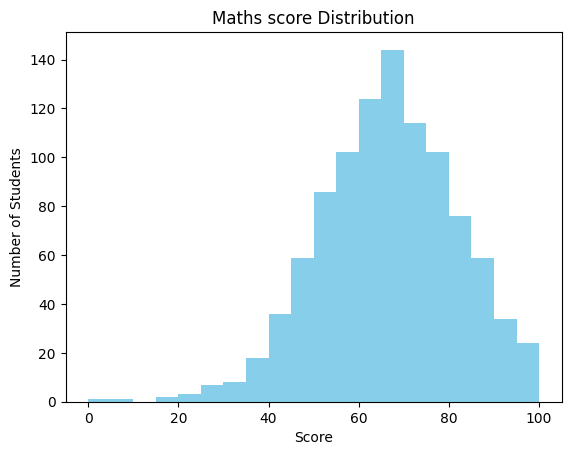

In [9]:
plt.hist(df['math score'],bins=20, color = 'skyblue')
plt.title('Maths score Distribution')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.show()

Import Libraries

In [10]:
import seaborn as sns

<Axes: xlabel='gender', ylabel='math score'>

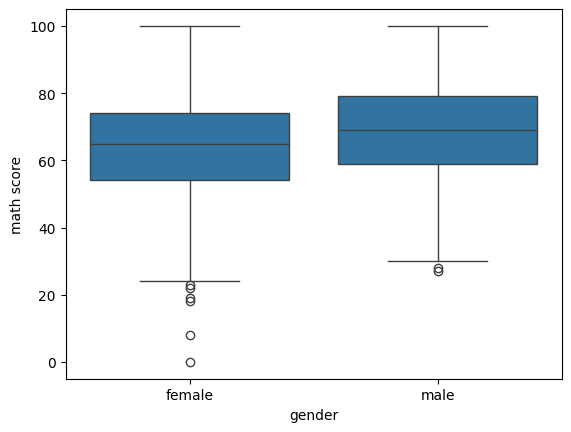

In [12]:
sns.boxplot(x='gender', y='math score', data=df)

In [13]:
print(df[df['gender'] == 'female']['reading score'].mean())

72.60810810810811


Import Libraries

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn.metrics import mean_squared_error

In [18]:
x = df[['reading score','writing score']]
y = df['math score']

Splitting the Data

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

Training the Model

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Predicting & Evaluating

In [21]:
predictions = model.predict(x_test)

In [22]:
mse = mean_squared_error(y_test,predictions)
print("Mean Squared Error:", mse)
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results.head())

Mean Squared Error: 74.9416303303179
     Actual  Predicted
521      91  79.943616
737      53  65.543622
740      80  69.368000
660      74  71.947227
411      84  76.693319


Import Libraries

In [24]:
from sklearn.preprocessing import LabelEncoder

Data Preprocessing & Label Encoding

In [25]:
df_exp = df.copy()

In [27]:
label_enc = LabelEncoder()
for col in df_exp.columns:
  if df_exp[col].dtype == 'object':
    df_exp[col] = label_enc.fit_transform(df_exp[col])

x = df_exp.drop('math score', axis=1)
y = df_exp['math score']

Import Libraries

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

Import Libraries

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2 = r2_score(y_test, predictions)
print("R² Score:", r2)

R² Score: 0.749884004871656


In [33]:
df['avg_read_write'] = (df['reading score'] + df['writing score'])/2

Train-Test Split

In [34]:
x = df.drop('math score', axis=1)
y = df['math score']

Model Training

In [35]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

Prediction & Evaluation

In [36]:
r2 = r2_score(y_test, predictions)
print("R² Score:", r2)

R² Score: 0.749884004871656


Visualization: Actual vs Predicted

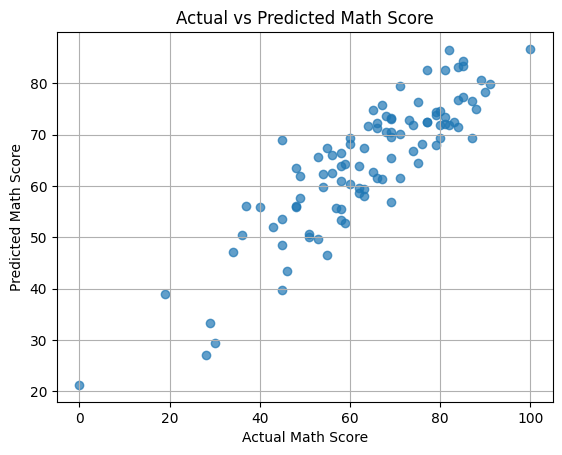

In [37]:
plt.scatter(y_test, predictions, alpha=0.7)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Score')
plt.grid(True)
plt.show()

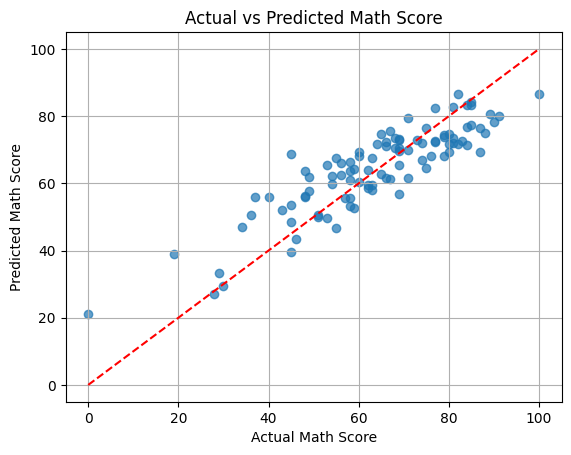

In [39]:
import numpy as np

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.scatter(y_test, predictions, alpha=0.7)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Score')
plt.grid(True)
plt.show()

Correlation Heatmap

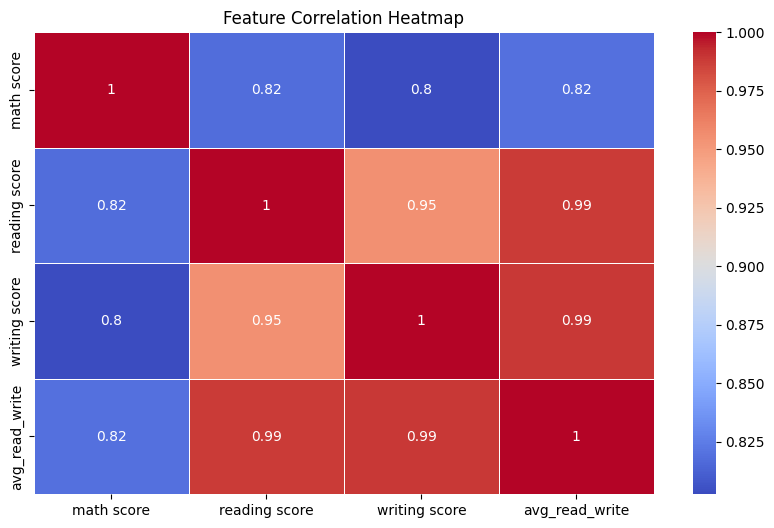

In [41]:
df_numeric = df.select_dtypes(include='number')

plt.figure(figsize=(10,6))
correlation = df_numeric.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

#Conclusion

- The model achieved an R² Score of around **0.75**, meaning it can explain about 75% of the variance in math scores.
- Reading and writing scores, as expected, have strong influence on math performance.
- The correlation heatmap confirms these relationships.

This project demonstrates a basic machine learning regression pipeline and can be further improved using advanced techniques or deeper feature engineering.


# Final Thoughts

This project taught me how to explore data, clean it, build a machine learning model, and evaluate it using real metrics. I worked with pandas, matplotlib, seaborn, and scikit-learn. The final R² score was around 0.75, showing decent performance.

This is my first ML project — and it’s just the beginning.
